<a href="https://colab.research.google.com/github/k-alaya9/simpsone/blob/main/Simpsone_Training_built_in_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
from google.colab import files

files.upload() #this will prompt you to upload the kaggle.json


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"khaledalaya","key":"607d65a57ea185a782124b75057b1ecb"}'}

In [ ]:
!ls -lha kaggle.json

-rw-r--r-- 1 root root 67 Nov  2 12:48 kaggle.json


In [ ]:
!pip install -q kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 /root/.kaggle/kaggle.json



In [ ]:
!pwd

/content


In [ ]:
!kaggle datasets list

ref                                                          title                                           size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------  ---------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
valakhorasani/mobile-device-usage-and-user-behavior-dataset  Mobile Device Usage and User Behavior Dataset   11KB  2024-09-28 20:21:12          16720        366  1.0              
bhadramohit/world-bank-dataset                               World Bank Dataset                               5KB  2024-10-20 14:57:06           1323         26  1.0              
bhadramohit/smartphone-usage-and-behavioral-dataset          Smartphone Usage and Behavioral Dataset         17KB  2024-10-23 03:16:02           1427         31  1.0              
valakhorasani/gym-members-exercise-dataset                   Gym Members Exercise Dataset           

In [ ]:
!kaggle datasets download -d alexattia/the-simpsons-characters-dataset

Dataset URL: https://www.kaggle.com/datasets/alexattia/the-simpsons-characters-dataset
License(s): CC-BY-NC-SA-4.0
 99% 1.07G/1.08G [00:22<00:00, 36.6MB/s]
100% 1.08G/1.08G [00:23<00:00, 50.2MB/s]


In [ ]:
!unzip the-simpsons-characters-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1271.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1272.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1273.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1274.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1275.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1276.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1277.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1278.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1279.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1280.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1281.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1282.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pi

In [ ]:
!pip install caer canaro

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 809.5/809.5 kB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 40.7 MB/s eta 0:00:00


In [ ]:
import os
import caer
import canaro
import numpy as np
import cv2 as cv
import gc

In [ ]:
IMAGE_SIZE=(80,80)
CHANNEL=1
CHAR_PATH=r'/content/simpsons_dataset'

In [ ]:
char_dic={}
for char in os.listdir(CHAR_PATH):
    char_dic[char]=len(os.listdir(os.path.join(CHAR_PATH,char)))

# sort
char_dic=caer.sort_dict(char_dic,descending=True)
char_dic

[('homer_simpson', 2246),
 ('ned_flanders', 1454),
 ('moe_szyslak', 1452),
 ('lisa_simpson', 1354),
 ('bart_simpson', 1342),
 ('marge_simpson', 1291),
 ('krusty_the_clown', 1206),
 ('principal_skinner', 1194),
 ('charles_montgomery_burns', 1193),
 ('milhouse_van_houten', 1079),
 ('chief_wiggum', 986),
 ('abraham_grampa_simpson', 913),
 ('sideshow_bob', 877),
 ('apu_nahasapeemapetilon', 623),
 ('kent_brockman', 498),
 ('comic_book_guy', 469),
 ('edna_krabappel', 457),
 ('nelson_muntz', 358),
 ('lenny_leonard', 310),
 ('mayor_quimby', 246),
 ('waylon_smithers', 181),
 ('maggie_simpson', 128),
 ('groundskeeper_willie', 121),
 ('barney_gumble', 106),
 ('selma_bouvier', 103),
 ('carl_carlson', 98),
 ('ralph_wiggum', 89),
 ('patty_bouvier', 72),
 ('martin_prince', 71),
 ('professor_john_frink', 65),
 ('snake_jailbird', 55),
 ('cletus_spuckler', 47),
 ('rainier_wolfcastle', 45),
 ('simpsons_dataset', 42),
 ('agnes_skinner', 42),
 ('sideshow_mel', 40),
 ('otto_mann', 32),
 ('gil', 27),
 ('fat_

In [ ]:
characters=[]
count=0
for i in char_dic:
    count+=1
    characters.append(i[0])
    if count>=10:
        break
characters

['homer_simpson',
 'ned_flanders',
 'moe_szyslak',
 'lisa_simpson',
 'bart_simpson',
 'marge_simpson',
 'krusty_the_clown',
 'principal_skinner',
 'charles_montgomery_burns',
 'milhouse_van_houten']

In [ ]:
# Create the rainign data
train=caer.preprocess_from_dir(CHAR_PATH,characters,IMAGE_SIZE,channels=CHANNEL,isShuffle=True,)

[INFO] Could not find a file to load from. Generating the training data
----------------------------------------------
[INFO] At 1000 files
[INFO] At 2000 files
[INFO] 2246 files found in 0.010091066360473633s
[INFO] At 1000 files
[INFO] 1454 files found in 0.005354642868041992s
[INFO] At 1000 files
[INFO] 1452 files found in 0.0032525062561035156s
[INFO] At 1000 files
[INFO] 1354 files found in 0.0030295848846435547s
[INFO] At 1000 files
[INFO] 1342 files found in 0.003045320510864258s
[INFO] At 1000 files
[INFO] 1291 files found in 0.002910137176513672s
[INFO] At 1000 files
[INFO] 1206 files found in 0.0026056766510009766s
[INFO] At 1000 files
[INFO] 1194 files found in 0.0031070709228515625s
[INFO] At 1000 files
[INFO] 1193 files found in 0.004250764846801758s
[INFO] At 1000 files
[INFO] 1079 files found in 0.004156351089477539s
----------------------------------------------
[INFO] 13811 files preprocessed! Took 0m 19s


In [ ]:
len(train)

13811

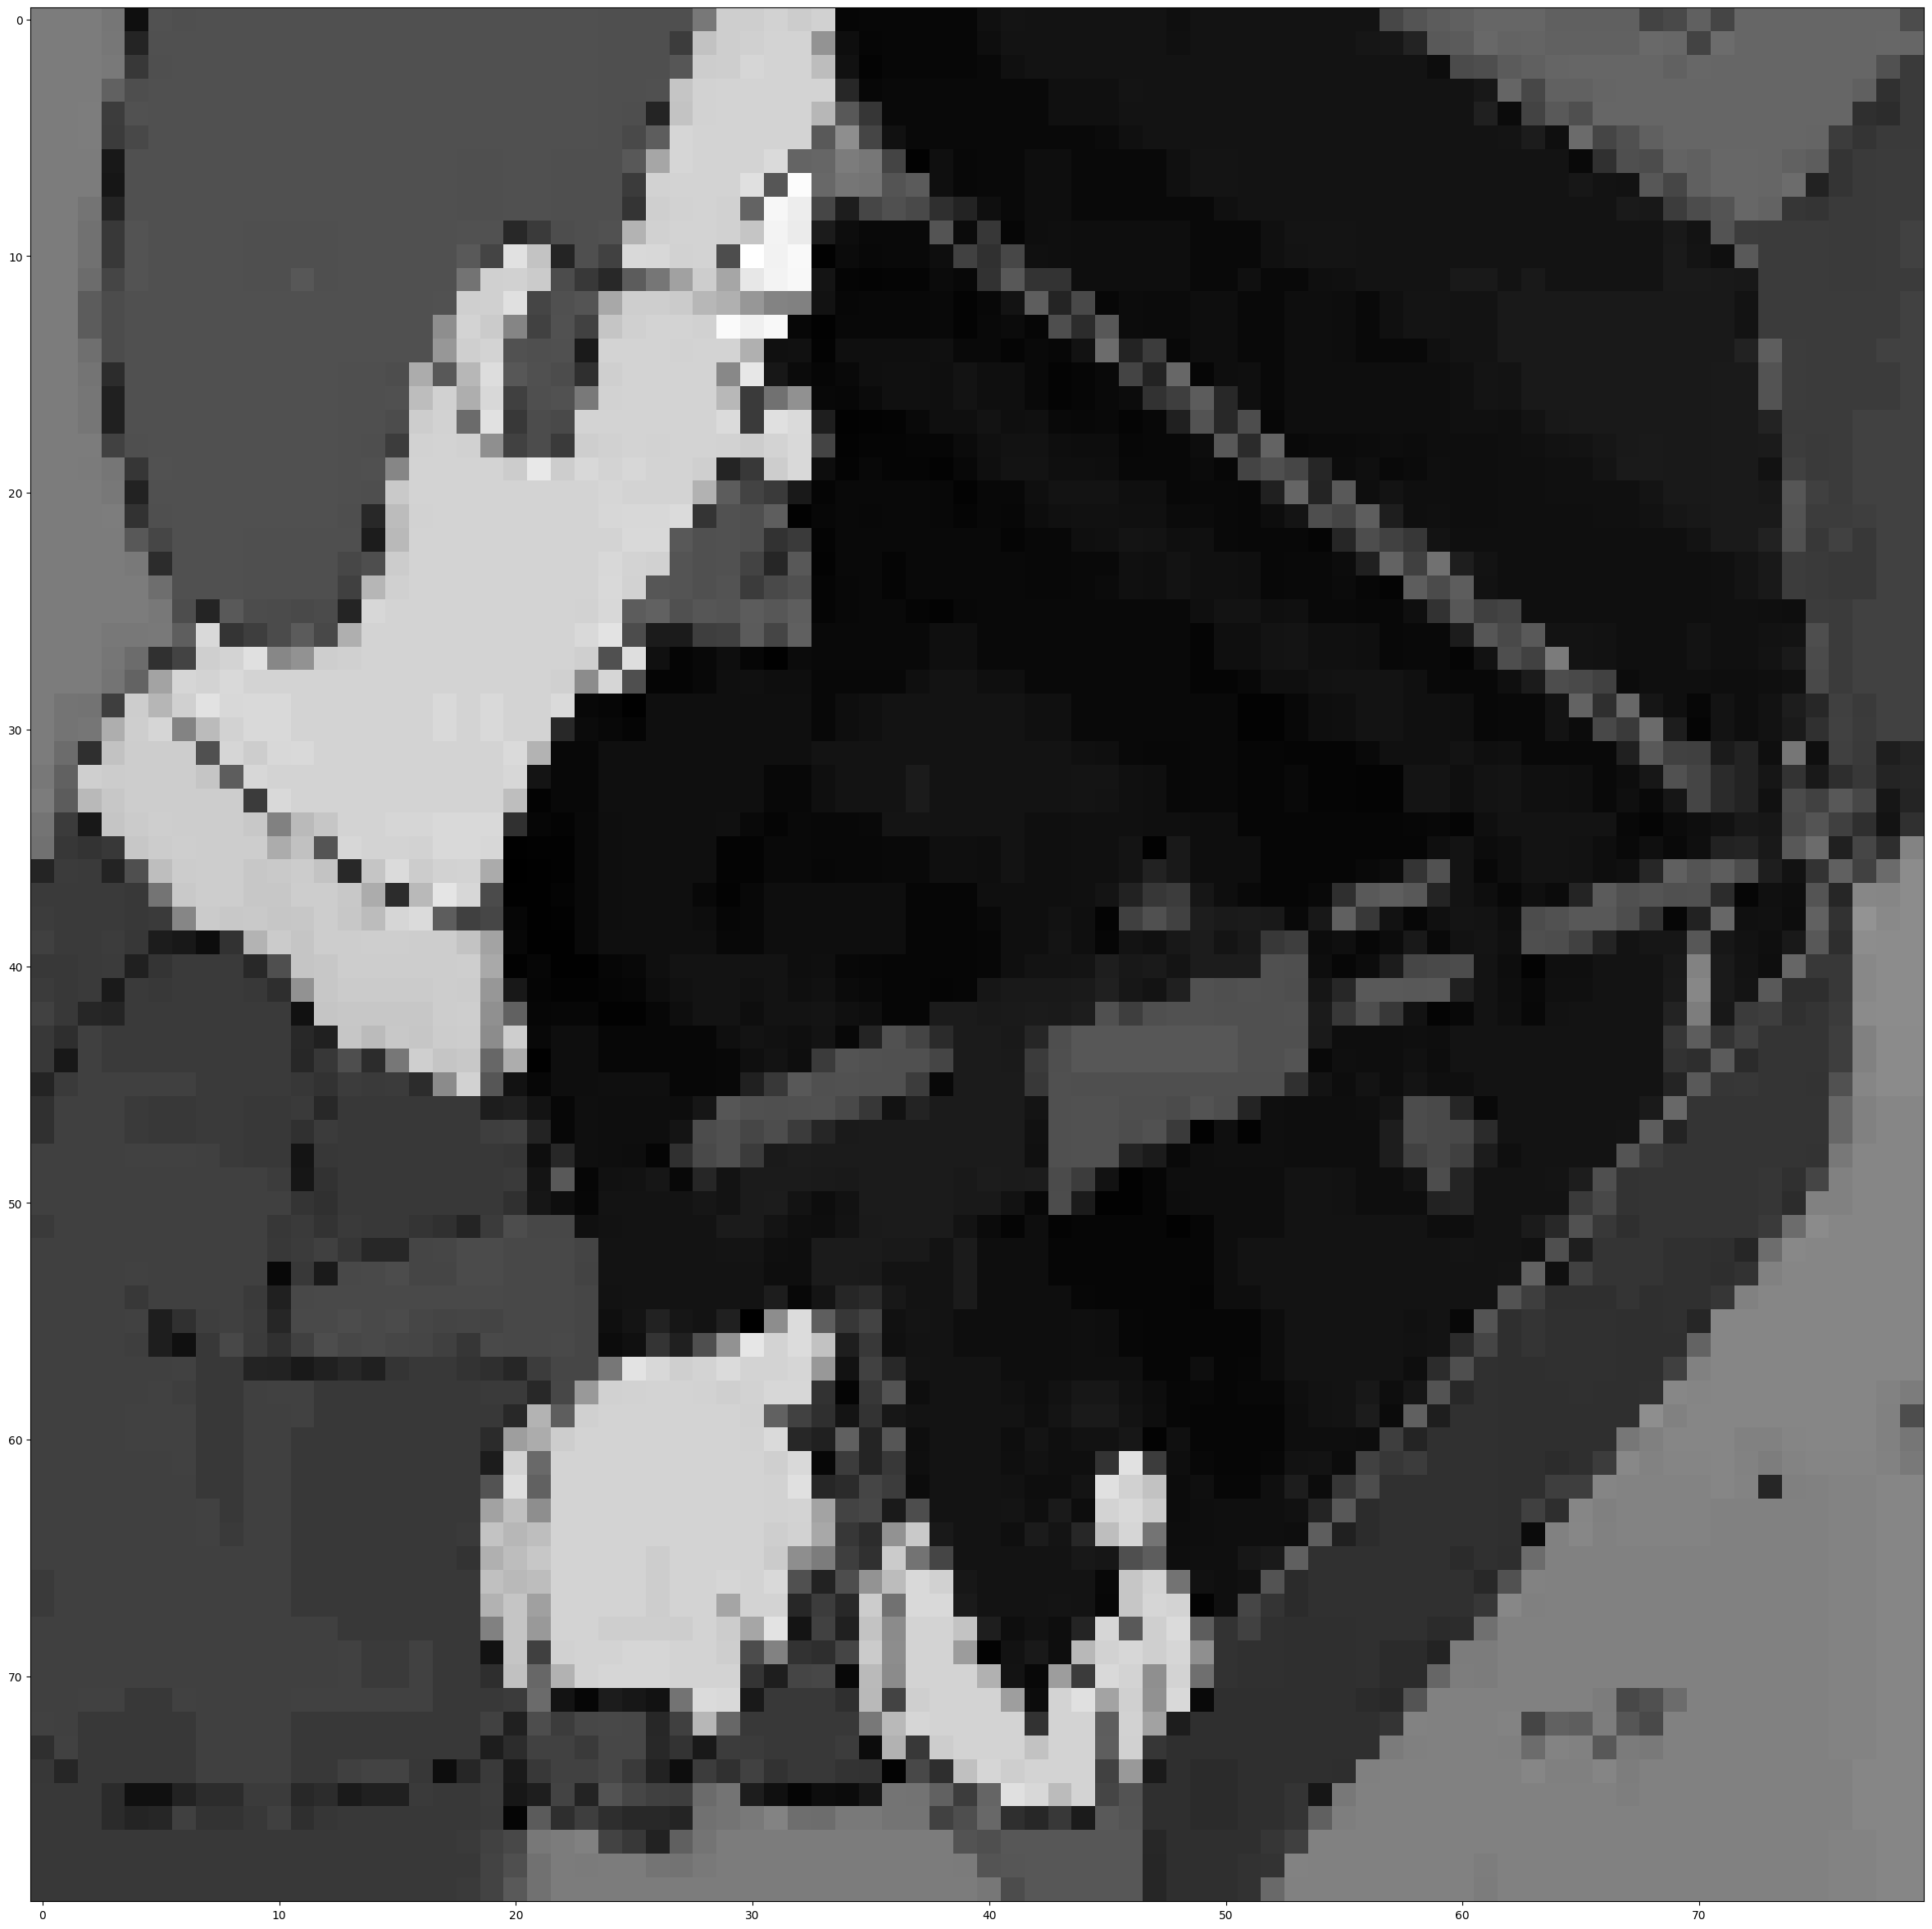

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,30))
plt.imshow(train[0][0],cmap='gray')
plt.show()

In [ ]:
featuerSet,labels=caer.sep_train(train,IMAGE_SIZE)

In [ ]:
from tensorflow.keras.utils import to_categorical
#normailze
featuerSet=caer.normalize(featuerSet)
labels=to_categorical(labels,len(characters))

In [ ]:
x_train,x_val,y_train,y_val=caer.train_val_split(featuerSet,labels,val_ratio=0.2)

In [ ]:
del train
del featuerSet
del labels
gc.collect()

0

In [ ]:
# image data generator
datagen=canaro.generators.imageDataGenerator()
train_gen=datagen.flow(x_train,y_train,batch_size=32)

In [ ]:
!pip install tensorflow==2.16.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 61.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 4.3 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.0
    Uninstalling tensorboard-2.17.0:
      Successfully uninstalled tensorboard-2.17.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.17.0
    Uninstalling tensorflow-2.17.0:
      Successfully uninstalled tensorflow-2.17.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.17.0 requires tensorflow<2.18,>=2.17, but you have tensorflow 2.16.1 wh

In [ ]:
# create the model
model=canaro.models.createSimpsonsModel(IMAGE_SIZE,channels=CHANNEL,output_dim=len(characters),loss='binary_crossentropy',decay=1e-7,learning_rate=0.001,momentum=0.9,nesterov=True)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 80, 80, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 78, 78, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 39, 39, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 39, 39, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 39, 39, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 37, 37, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 18, 18, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 18, 18, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 18, 18, 256)         │         147,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 16384)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 16384)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1024)                │      16,778,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │          10,250 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,591,274 (67.11 MB)

 Trainable params: 17,591,274 (67.11 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.callbacks import LearningRateScheduler
callbacks_list=[LearningRateScheduler(canaro.lr_schedule)]

In [ ]:
training=model.fit(train_gen,
                   steps_per_epoch=len(x_train)//32,
                   epochs=100,
                   validation_data=(x_val,y_val),
                   validation_steps=len(y_val)//32,
                   callbacks=callbacks_list)

Epoch 1/100
345/345 ━━━━━━━━━━━━━━━━━━━━ 16s 45ms/step - accuracy: 0.2422 - loss: 0.3049 - val_accuracy: 0.2800 - val_loss: 0.3127 - learning_rate: 0.0100
Epoch 2/100
  1/345 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.2188 - loss: 0.3123

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


345/345 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2188 - loss: 0.3123 - val_accuracy: 0.2775 - val_loss: 0.3135 - learning_rate: 0.0100
Epoch 3/100
345/345 ━━━━━━━━━━━━━━━━━━━━ 20s 45ms/step - accuracy: 0.2505 - loss: 0.3031 - val_accuracy: 0.2833 - val_loss: 0.3019 - learning_rate: 0.0100
Epoch 4/100
345/345 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3125 - loss: 0.2944 - val_accuracy: 0.2876 - val_loss: 0.3011 - learning_rate: 0.0100
Epoch 5/100
345/345 ━━━━━━━━━━━━━━━━━━━━ 15s 43ms/step - accuracy: 0.2726 - loss: 0.2987 - val_accuracy: 0.3039 - val_loss: 0.2990 - learning_rate: 0.0100
Epoch 6/100
345/345 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4062 - loss: 0.3000 - val_accuracy: 0.3021 - val_loss: 0.2987 - learning_rate: 0.0100
Epoch 7/100
345/345 ━━━━━━━━━━━━━━━━━━━━ 18s 38ms/step - accuracy: 0.2760 - loss: 0.2978 - val_accuracy: 0.3166 - val_loss: 0.2942 - learning_rate: 0.0100
Epoch 8/100
345/345 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1875 - loss: 0.3068 -

In [ ]:
test_path=r'/content/kaggle_simpson_testset/kaggle_simpson_testset/bart_simpson_3.jpg'
img=cv.imread(test_path)
def prepare(image):
    image=cv.cvtColor(image,cv.COLOR_BGR2GRAY)
    image=cv.resize(image,IMAGE_SIZE)
    image=caer.reshape(image,IMAGE_SIZE,1)
    return image

In [ ]:
pred=model.predict(prepare(img))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 837ms/step


In [ ]:
print(characters[np.argmax(pred[0])])

lisa_simpson


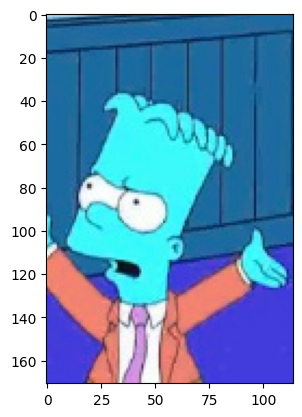

In [ ]:
plt.imshow(img)
plt.show()